### Data Exploration and Visualization

In [768]:
# import important libraries 
import pandas as pd
import json
import requests
import json
import os
import pickle
import numpy as np

# libraries for plotting
# imports below are for plotly 
import ipywidgets as widgets
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)   # for offline mode use
import plotly.figure_factory as ff
import plotly.offline as offline
import sys


# matplotlib library for plotting
import matplotlib.pyplot as plt
%matplotlib inline

###
from nltk.probability import FreqDist
import spacy
from collections import Counter

from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator


#### 
from spacy.lang.en.stop_words import STOP_WORDS


# Using nltk library
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize



# helper function for text processing
cwd = os.getcwd() # current working directory
sys.path.append(cwd)
#from textprocessor import nlp_cleaner,stop_words_cleaner,testempty,cleanData,datapreprocess2,datapreprocess
#from plotfunction import linePlot,StackedHistoPLot
from PIL import Image

# nltk convert plural to singular
import inflect
# word corpus
from nltk.corpus import words
from nltk.corpus import wordnet
# stemmer 
from nltk.stem.snowball import SnowballStemmer

from nltk.stem.porter import *

import re

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [521]:
# function to convert plural words to singular
inflectEngine = inflect.engine()
singular = lambda x: inflectEngine.singular_noun(x)

# stemmer
snowBallStemmer = SnowballStemmer("english")

In [739]:
# stopwords to be removed
nltk.download('stopwords')
nltk.download('punkt')
default_stopwords = set(stopwords.words('english')) # stp words


custom_words = ('individual','understanding','continue','hospital','required','specific','diseases', 'although','performance', 'infection', 'pathogen', 'patients','population','different','thus',
                'used','results','available','thus','several','based','role','number','developed','time','improve','possible','many','may',
                'using', ',', 'change', 'level', 'release', 'increase', ';', 'infection','disease','use','need','case','system','disease',
                'likely','host','response','effect','suggest','risk','control','pathogen','infectious','effective','future','technology',
                'opaque', 'infections','type','virus','well', 'associated','studies','effect','provide','potential','information','current','methods',
                'application','management','factor','year','tool','work','area','effects','mechanism','mechanisms','causes','cause',
                'development','system','many','research','including','although','method','human','study','data','health',
                'significant','needed','found','factor','finding','shown','facor','strategies','factors',
                'cell','specie','cells','species','target','common','approach','changes','within','system','compound','transmission',
                'viruses','many','treatment','printed', 'cell', 'model', 'result','patient','important','increased','support')



[nltk_data] Downloading package stopwords to /home/bigdata-
[nltk_data]     lap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/bigdata-
[nltk_data]     lap/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [743]:
def nlp_cleaner(dataframe_column,stopwords=None,flag=True):
    '''
    function to clean the text in a data frame
    
    input: dataframe column
    
    ouput: cleaned and tokenized dataframe column
    
    '''
    
    # update deafult words with custom words
    dataframe_columns = dataframe_column.apply(lambda x: word_tokenize(x) )
     # convert all words to lower case to be able to extract stopwords. stopwords are 
    # usually in lower case in nltk library
    dataframe_columns = dataframe_columns.apply(lambda x: [token.lower() for token in x])
    #conclusion = conclusion.apply(lambda x: [token for token in x if token not in default_stopwords])
    dataframe_columns = dataframe_columns.apply(lambda x: [token for token in x if token not in stopwords])
     # remove stop words
    
    if not flag:
        
        return dataframe_columns
    else:
        
        # extract numeric word elements
        dataframe_column = dataframe_column.apply(lambda x: [token for token in x if not token.isnumeric()])
        # remove word elements of length less than 3 
        cutoff_word_length=3
        dataframe_columns= dataframe_columns.apply(lambda x: [token for token in x if len(token)>cutoff_word_length])

        # remove alpha numeric word tokens
        dataframe_columns = dataframe_columns.apply(lambda x: [token for token in x  if not re.match('^(?=.*[0-9]$)(?=.*[a-zA-Z])', token)])
        return dataframe_columns

#### Load data

In [ ]:
merged_data = pd.read_parquet('merged_data.parquet.gzip')

In [ ]:
merged_data[merged_data['conclusions']!='']['conclusions']

#### Wordcloud Without Custom StopWord

In [744]:
conclusions = nlp_cleaner(merged_data[merged_data['conclusions']!='']['conclusions'],stopwords=default_stopwords,flag=False)

In [745]:
text_element = conclusions.to_list()
text_element = [item for sublist in text_element for item in sublist]

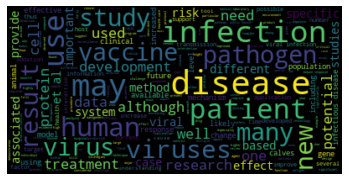

In [746]:
text = ' '.join(text_element)
wordcloud = WordCloud().generate(text)
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Wordcloud With Custom StopWord

In [747]:
# update with custom stopwords
default_stopwords.update(custom_words)

In [748]:
conclusion = nlp_cleaner(merged_data[merged_data['conclusions']!='']['conclusions'],default_stopwords)

In [749]:
text_element = conclusion.to_list()
text_element = [item for sublist in text_element for item in sublist]
#text_element = [singular(item) for  item in text_element  if singular(item)]
cloudStopWords = set(STOPWORDS)


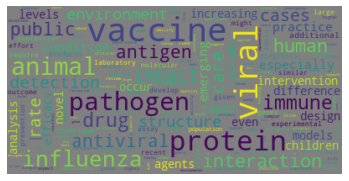

In [750]:
cloudStopWords.update(['outbreaks','evidence','process','model','improved','therapy','become','medical','identified','benefits','gene','agent','programs','still','reduce','lead','case','field','events','vaccination','therapeutic','particular','multiple','surveillance','complex','impacts','remain','compared','high','systems','demonstrated','function','among','level','challenge','various','must','related','present','better','calves','addition','major','clinical','example','appear','product','production','appear','first'])
j = ' '.join(text_element)
wordclouds = WordCloud(stopwords=cloudStopWords,max_font_size=40,background_color='gray').generate(j)
plt.figure()
plt.imshow(wordclouds, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Wordcloud Without Dictionary English Words

In [504]:
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package wordnet to /home/bigdata-
[nltk_data]     lap/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [721]:
text_element = conclusion.to_list()
text_element = [item for sublist in text_element for item in sublist]

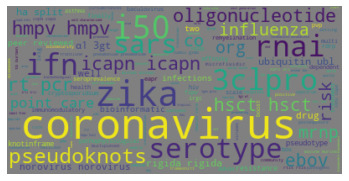

In [725]:
#text_element=[porterStemmer.stem(item) for item in text_element]
#text_element = [singular(item) for  item in text_element  if singular(item)]
#text_element = [token for token in text_element if not token.isnumeric()]
#text_element = [token for token in text_element if not token.isalpha()]
#text_element = [token for token in text_element  if not re.match('^(?=.*[0-9]$)(?=.*[a-zA-Z])', token)]
text_element = [item for  item in text_element  if not wordnet.synsets(item)]
setofwords = set(words.words())
text_element = [item for  item in text_element  if item not in setofwords]

# make wordcloud
j = ' '.join(text_element)
cloudStopWords.update(['point-of-care','reemerging','wageningen','fold','structure','structure-based','structurall','viral','microbiome','prime','founder','author','virally','risk-benefit','rna','biomarkers','ribosomal','prime-boost','prime/boost','throughput','cross','nanoparticles','mg','term','broad','pre','derived','kg','covs','nanoparticle','transgenic','nucleic','dna','frameshifting','coronaviruses','self','protein','induced','pseudoknot','vitro','virus','re','sp','isgs','mers','human','host','pathogen','biochar','one','site','although','cnts','sirna','sirnas','infected','infected','cell','non','associated','mediated','disease','gal','vivo','anti','3cipro','infection','based','specific','hcws','cov','dsrna','others'])
wordclouds = WordCloud(stopwords=cloudStopWords,max_font_size=50,background_color='gray').generate(j)
plt.figure()
plt.imshow(wordclouds, interpolation="bilinear")
plt.axis("off")
plt.show()

### Frequency Distribution

In [1178]:
text_element = merged_data[merged_data['conclusions']!='']['conclusions'][0:2000].tolist()
text_element = [item for item in text_element ]
text = ' '.join(text_element)
stop_words = set(stopwords.words('english'))

In [1179]:
custom_words = ('supplemental material).','.',').','(Fig.','Figure','Fig','As shown Fig.','.','6','(', 'Figure 2')
stop_words.update(custom_words)

In [1210]:
text2 = ' '.join(w for w in text.split() if w not in stop_words)
text2 = ' '.join(w for w in text.split() if w not in case)
text2 = ' '.join(w for w in text2.split() if  not  re.match('^(?=.*[0-9]$)(?=.*[a-zA-Z])', w))
text2 = ' '.join(w for w in text2.split() if    not  w.isnumeric())
text2 = ' '.join(re.sub(r"\s*[0-9]+([.]|$)", r"\1", w) for w in text2.split() )
stop_sentences = set(["Fig."])

In [1211]:
stop_sentences

{'Fig.'}

In [1575]:

tokenized_nostops=sent_tokenize(text2) # sentence_tokenize the text



tokenized_nostops = [w for w in tokenized_nostops if w not in stop_sentences]
tokenized_nostops =[w for w in tokenized_nostops if w not in stop_words]
#tokenized_nostops = [re.sub(r"\s*[0-9]+([.]|$)", r"\1", w) for w in tokenized_nostops]
freq = Counter(tokenized_nostops) # counter to compute frequency

top_10_indications = freq.most_common(30)

In [1576]:
top_10_indications

[('In particular, dust mite, cockroach, grass pollens, and the fungus Alternaria have been shown to induce high-titer IgE antibody (i.e., IU/mL) and in some instances to increase total serum IgE.',
  2),
 ('In contrast, with cat and dog allergens, not only are positive skin tests less common, but the titer of IgE antibody is generally lower.',
  2),
 ('Thus, some allergens, but not others, can increase total IgE to a level that is associated with acute episodes.',
  2),
 ('This effect may contribute to the higher prevalence and severity of asthma in some communities (e.g., New Zealand, United Kingdom, and the North American inner city) compared with others (e.g., Scandinavia).The relevance of immunopathogenesis to treatment can be seen in three ways.',
  2),
 ('First, controlling the inflammatory response has become a mainstay of treatment using inhaled steroids, leukotriene antagonists, and, in a small number of cases, anti-IgE.',
  2),
 ('Second, allergen-specific treatment using avo

In [1570]:
#[i[0] for i in top_10_indications if top_10_indications.index(i)>16]

In [1574]:
stop_sentences.update([i[0] for i in top_10_indications])

In [1245]:
stop_sentencesupdate

{'A current example of such an effort is within the filovirus community, where animal models, euthanasia criteria, assays, and virus strains are in the process of being standardized.',
 'A few applications discussed in this chapter have already been developed and are already helping patients all over the world.',
 'A minority of scientists have argued that, in the face of a highly lethal disease such as EVD, anything plausibly efficacious should be tested by clinicians either in individual patients or in case series.',
 'A polymicrobial involvement seems likely given the multiple species detected in the AD brain.',
 'A recent study on the frameshift signal has shown that a decrease in the translation initiation frequency can lead to an increase in the frequency of frameshifting (38) Also a previous study in yeast has shown a correlation between frameshifting and translation initiation frequency (36) Our data with the enlargement of also hint at a possible role for folding kinetics.Alth

In [1242]:
ofInterest = top_10_indications

In [1307]:
ofInterest.append([i for i in top_10_indications if top_10_indications.index(i)>16])

In [1578]:
val = [i[0] for i in ofInterest]
freq = [i[1] for i in ofInterest]

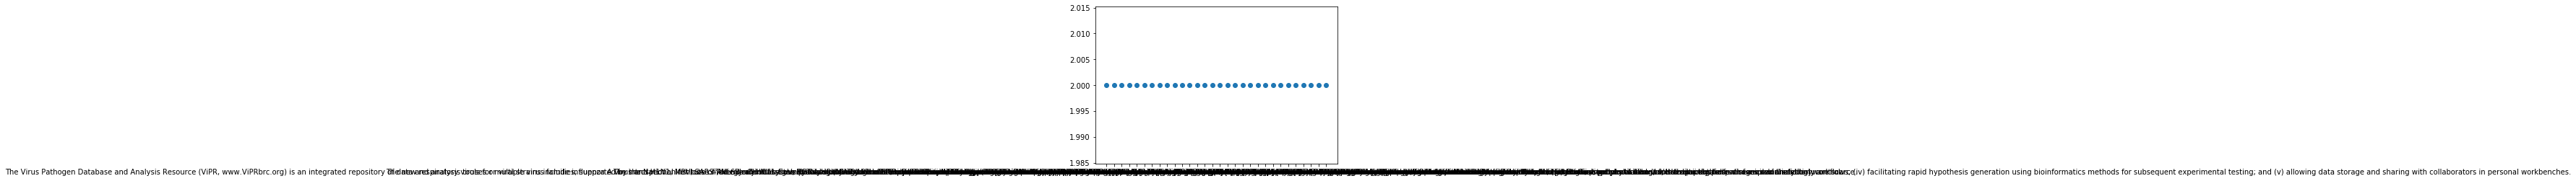

In [1590]:
plt.scatter(val[:-1],freq[:-1])
plt.show()

In [1577]:
fdist = FreqDist(ofInterest)
plt.title('frequency distribution of top 10 most common drug indication (stop words not removed)')
fdist.plot(20,cumulative=False)

plt.show()

TypeError: unhashable type: 'list'

### Frequency Distribution


Work in progress

In [909]:
text_element = merged_data[merged_data['text']!='']['text'][0:2000].tolist()
text_element = [item for item in text_element ]
text = ' '.join(text_element)
stop_words = set(stopwords.words('english'))


In [942]:
custom_words = ('supplemental material).','.',').','(Fig.','Figure','Fig','As shown Fig.','.','6','(', 'Figure 2')
stop_words.update(custom_words)

In [975]:
for i in case:
    stop_words.update(i[0])

In [977]:
case

[('.', 1990),
 ('AE .', 732),
 ('Fig.', 302),
 ('MB.', 202),
 ('As shown Fig.', 136),
 ('no.', 132),
 ('vs. .', 74),
 ('supplemental material).', 72),
 ('PDF file, .', 68),
 ('(.', 62),
 ('TIF file, .', 60),
 ('-.', 60),
 ('considered statistically significant.', 58),
 ('years.', 48),
 ('In addition, LTLC induced cell proliferation.', 48),
 ('considered significant.', 40),
 ('vs .', 36),
 ('(95% CI .', 36),
 ('versus .', 36),
 ('days.', 34),
 ('T. Ullal, D. Twedt.', 34),
 ('fig.', 32),
 ('NTP archives.', 30),
 ('Quantitative proteomics using SILAC HRSV-infected cells versus mock-infected cells.',
  30),
 ('mmHg/ .', 30),
 ('years).', 28),
 ('Bars, nm.', 28),
 ('value .', 26),
 ('ng/mL.', 26),
 ('Mean SEM; two independent experiments, four mice/group.', 26)]

In [979]:
stop_words.update('TIF file, .')

In [987]:
text2[1]

'n'

In [985]:
text2 = ' '.join(w for w in text.split() if w not in stop_words)
text2 = ' '.join(w for w in text.split() if w not in case)
text2 = ' '.join(w for w in text2.split() if  not  re.match('^(?=.*[0-9]$)(?=.*[a-zA-Z])', w))
text2 = ' '.join(w for w in text2.split() if    not  w.isnumeric())
text2 = ' '.join(re.sub(r"\s*[0-9]+([.]|$)", r"\1", w) for w in text2.split() )



In [1184]:

tokenized_nostops=sent_tokenize(text2) # sentence_tokenize the text



tokenized_nostops = [w for w in tokenized_nostops if w not in case]
tokenized_nostops =[w for w in tokenized_nostops if w not in stop_words]
#tokenized_nostops = [re.sub(r"\s*[0-9]+([.]|$)", r"\1", w) for w in tokenized_nostops]
freq = Counter(tokenized_nostops) # counter to compute frequency

top_10_indications = freq.most_common(30)

SyntaxError: invalid syntax (<ipython-input-1184-c897ac376d93>, line 9)

In [1175]:
top_10_indications

[('The difference in median values between groups was analyzed using the Wilcoxon rank sum test, with the significance level set at an α of ..section: Definitions of Infection Measurements and Statistical Analyses:Linear regression was performed on the number of days from challenge to the start/peak of shedding for the challenge virus versus the number of days for which the primary infection persisted following challenge, and a 95% confidence interval (CI) for the gradient was obtained; this indicates the interval that the start/peak of shedding for the challenge virus was delayed for each day that the primary infection persisted following challenge.',
  2),
 ('The null hypothesis, that there is no delay, was tested, with the significance level set at an α of ..section: Definitions of Infection Measurements and Statistical Analyses:The duration of infection with the challenge virus was compared for ferrets first infected and challenged with heterosubtypic influenza A viruses (when chal

In [1171]:
#case = set([i[0] for i in top_10_indications])

In [1172]:
case.update(i[0] for i in top_10_indications)

In [1173]:
case

{'• Infiltrate of mononuclear or polymorphonuclear leukocytes into the gland parenchyma.',
 'Although Traditional Chinese Medicine has been widely used as a complementary therapy for SUC, rigorous experiments and careful analysis of the resulting experimental data are required to validate the benefit and safety of this type of treatment.',
 'However, there are no studies determining reference values or evaluating the influence of gender and age on in healthy dogs.',
 'The .',
 'mg/kg were .',
 'vs .',
 'Irreversibly inhibits trypsin, chymotrypsin, and plasminogen activator.',
 'µM and .',
 'Tanaka et al.',
 '& .',
 'Known substrates for the tyrosine kinase receptors are SHC1, PI3K, and PLC-γ-.',
 '3D ).',
 'and Reverse Á 5?',
 'Table shows the incidence of ONFH in each group.',
 'and .002), with values of .',
 'Altogether, our findings indicate that in our system RNA silencing is not active against Sindbis virus (SINV) and might open the way to a better understanding of the antiviral r

In [929]:
line = "fig 5. https://en.wikipedia.org/wiki/Dictionary_(disambiguation)" 
print (re.sub("\d+\s\d+\.\d+", "", line))

fig 5. https://en.wikipedia.org/wiki/Dictionary_(disambiguation)


In [939]:
some_string = 'lorum ipsum 123 bar foo 1. \
               more text 46 here 2. some more text here \
               3. and even more text here 789'
some_string = re.sub(r"\s*[0-9]+([.]|$)", r"\1", line)

In [940]:
some_string

'fig. https://en.wikipedia.org/wiki/Dictionary_(disambiguation)'

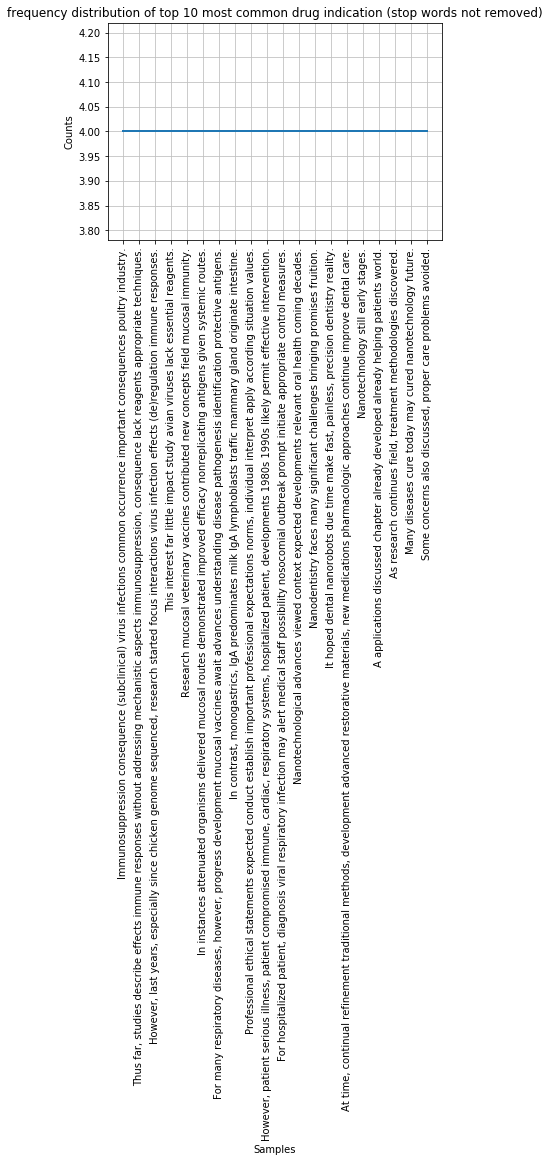

In [892]:
fdist = FreqDist(tokenized_nostops)
plt.title('frequency distribution of top 10 most common drug indication (stop words not removed)')
fdist.plot(20,cumulative=False)

plt.show()